#Sentiment Analysis using Linear Model Classifier with Hinge-loss and L1 Penalty with Language Model Features and Stochastic Gradient Descent in Python

This problem appeared as a project in the *edX course ColumbiaX: CSMM.101x Artificial Intelligence (AI)*. The following description of the problem is taken directly from the project description.

In this assignment, an active research area in Natural Language Processing (**NLP**), **sentiment analysis** will be touched on. Given the exponential growth of online review data (Amazon, IMDB and etc), **sentiment analysis** becomes increasingly important. In this assignment, the task will be to build a sentiment classifier, i.e., evaluating a piece of text being either positive or negative. 

The "**Large Movie Review Dataset**"(*) shall be used for this project. The dataset is compiled from a collection of 50,000 reviews from IMDB on the condition there are no more than 30 reviews each movie. Number of positive and negative reviews are equal. Negative reviews have scores lesser or equal 4 out of 10 while a positive review greater or equal 7 out of 10. Neutral reviews are not included on the other hand. Then, 50,000 reviews are divided evenly into the training and test set.

*Dataset is credited to Prof. Andrew Mass in the paper, Andrew L. Maas, Raymond E. Daly, Peter T. Pham, Dan Huang, Andrew Y. Ng, and Christopher Potts. (2011). Learning Word Vectors for Sentiment Analysis. The 49th Annual Meeting of the Association for Computational Linguistics (ACL 2011).

In [5]:
#ipython nbconvert pcaiso.ipynb
%matplotlib inline

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

##Instruction

In this project, a **Stochastic Gradient Descent Classifier** will be trained. While **gradient descent** is powerful, it can be prohibitively *expensive* when the dataset is *extremely large* because every single data point needs to be processed.

However, it turns out when the data is large, rather than the entire dataset, SGD algorithm performs just as good with a small random subset of the original data. This is the central idea of Stochastic SGD and particarly handy for the text data since corpus are often humongous.

##Data Preprocessing

The first task is explore the training data and create one single training data file combining the positive and negative labeled texts. The column “polarity” for each movie-review text consists of sentiment labels, 1 for positive and 0 for negative. In addition, common English stopwords should be removed.

The following table shows the first few rows of the training dataset. The training dataset contains *25000 movie reviews*.

In [1]:
import pandas as pd
train_df = pd.read_csv('C:/courses/Edx/Current/AI/Week11/sentiment/imdb_tr.csv', index_col=0)
#df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)
train_df.head()
#print train_df.shape

,text,polarity
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


##Unigram Data Representation

The very first step in solving any NLP problem is finding a way to represent the text data so that machines can understand. A common approach is using a document-term vector where each document is encoded as a discrete vector that counts occurrences of each word in the vocabulary it contains. For example, consider two one-sentence documents:  

* d1: "I love Columbia Artificial Intelligence course".
* d2: "Artificial Intelligence is awesome".

The *vocabulary* V = {artificial, awesome, Columbia, course, I, intelligence, is, love} and two documents can be encoded as v1 and v2 as follows:

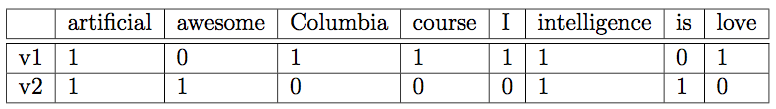

In [4]:
from IPython.display import Image
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week11\\sentiment\\im1.png')

This data representation is also called a **unigram model**.

Now, the next task is to transform the text column in the training dataset into a **term-document matrix** using **uni-gram model**. A few rows and columns of this transformed dataset with *unigram features* (**~75k** features) are shown as shown below. As can be noticed, *stemming* is not used.

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(min_df=1, stop_words='english', decode_error='ignore') # 'english'
X, y = vectorizer.fit_transform(train_df.text), train_df.polarity                    #.toarray() vectorizer.get_feature_names()
train_df_u = pd.DataFrame(X[:10,:].toarray(), columns=vectorizer.get_feature_names())
train_df_u[train_df_u.columns[30775:30785]].head()
#print train_df_u.shape

,hifi,hig,higgin,higginbotham,higgins,higginson,high,higham,highbrow,highbrows
0,0,0,0,0,0,0,5,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


As can be seen from the above table, the unigram feature matrix is extremely **sparse** (it took 1.6G space to store the first 10k rows as csv and after compressing the zipped file size became only ~4.5MB, around 99.5% sparse) and the following density plot shows density of the average number of occurences of all the unigram features (after discrading the top 15 freatures with the highest average number of occurences) and density is concentrated < 0.5, which means for the first 10k text reviews almost all the unigram features have average value of occurence < 0.5. 

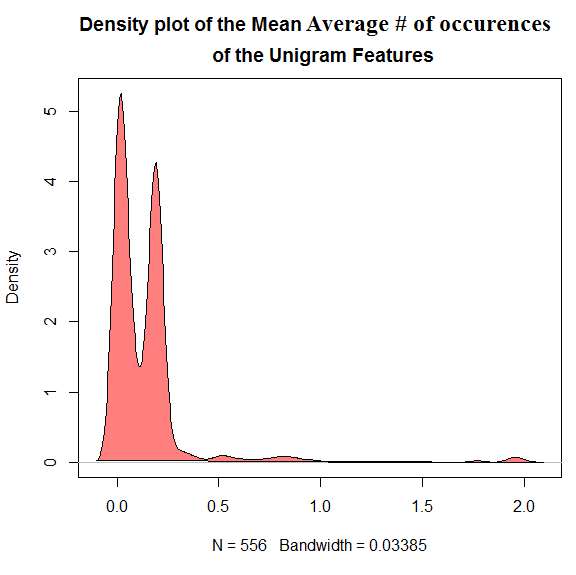

In [30]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week11\\sentiment\\uni.png')

In [ ]:
#train_df_u.to_csv('C:/courses/Edx/Current/AI/Week11/sentiment/imdb_tr_u.csv', index = False, encoding='utf-8')

Next, we need to train a *Stochastic Descend Gradient* (**SGD**) classifier whose *loss=“hinge”* and *penalty=“l1”* on this transformed training dataset.

On the other hand, a test dataset is provided which serves as the benchmark file for the performance of the trained classifier. Next task is to use the trained SGD to predict the sentiments of the text in the test dataset, after converting it to the corresponding *unigram* represenetation. the trained SGD classifier to predict this information. 

The test dataset too has 25000 text reviews and sentiment for each of them needs to be predicted. Here are the prediction counts for positive and negative sentiments predicted with the unigram model.

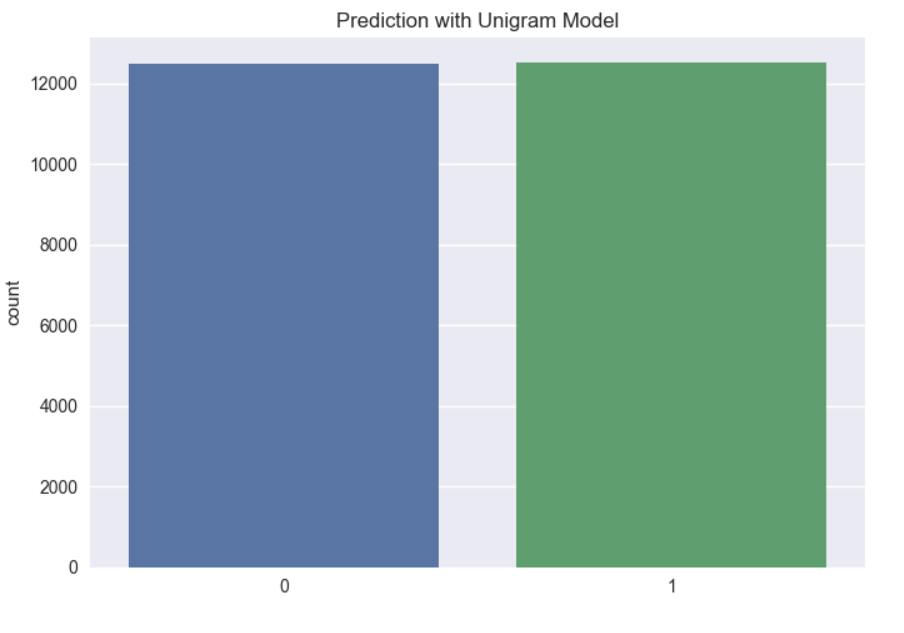

In [42]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week11\\sentiment\\puni.png')

##Bigram Representation

A more sophisticated data representation model is the **bigram model** where occurrences depend on a sequence of two words rather than an individual one. Taking the same example like before, v1 and v2 are now encoded as follows:

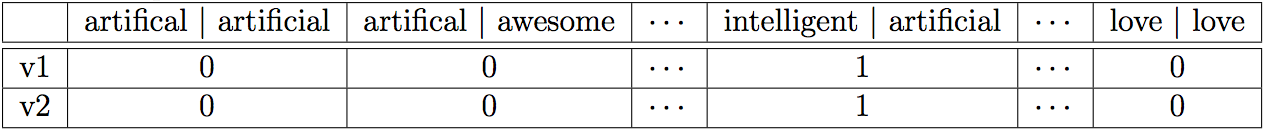

In [2]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week11\\sentiment\\im2.png')

Instead of enumerating every individual words, bigram counts the number of instance a word following after another one. In both d1 and d2 “intelligence” follows “artificial” so v1(intelligence | artificial) = v2(intelligence | artificial) = 1. In contrast, “artificial” does not follow “awesome” so v1(artificial | awesome) = v2(artificial | awesome) = 0. 

The same exercise from Unigram is to be repeated for the *Bigram Model Data Representation* and the corresponding test prediction file needs to be produced.  A few rows and columns of this transformed dataset with bigram features (**~175k total bigram features**) are shown as shown below.

In [39]:
vectorizer = CountVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1, stop_words='english', decode_error='ignore')
X, y = vectorizer.fit_transform(train_df.text), train_df.polarity                    #.toarray() vectorizer.get_feature_names()
#print X.shape
train_df_b = pd.DataFrame(X[35:45,:].toarray(), columns=vectorizer.get_feature_names())
train_df_b[train_df_b.columns[65110:65120]].head()

,amazing early,amazing edge,amazing editing,amazing educational,amazing effect,amazing effects,amazing effort,amazing eighties,amazing emotional,amazing enchanted
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


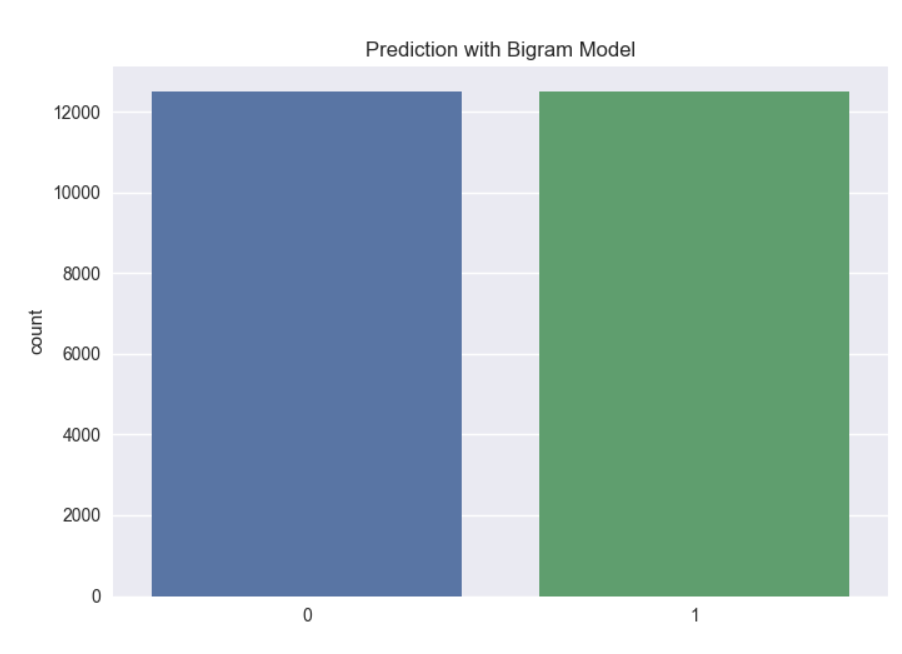

In [43]:
#train_df_b.to_csv('C:/courses/Edx/Current/AI/Week11/sentiment/imdb_tr_b.csv', index = False, encoding='utf-8')
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week11\\sentiment\\pbi.png')

##Tf-idf

Sometimes, a very high word counting may not be meaningful. For example, a common word like “say” may appear 10 times more frequent than a less-common word such as “machine” but it does not mean “say” is 10 times more relevant to our sentiment classifier. To alleviate this issue, we can instead use term frequency *tf[t] = 1 + log(f[t,d])* where *f[t,d]* is the count of term t in document d. The log function dampens the unwanted influence of common English words.

Inverse document frequency (idf) is a similar concept. To take an example, it is likely that all of our training documents belong to a same category which has specific jargons. For example, Computer Science documents often have words such as computers, CPU, programming and etc  appearing over and over. While they are not common English words, because of the document domain, their occurrences are very high. To rectify, we can adjust using inverse term frequency idf[t] = log( N / df[t] ) where df[t] is the number of documents containing the term t and N is the total number of document in the dataset.

Therefore, instead of just word frequency, tf-idf for each term t can be used, *tf-idf[t] = tf[t] ∗idf[t]*.  

The same exercise needs tp be repeated as in the Unigram and Bigram data model but *tf-idf* needs to be applied this time to produce test prediction files. 

A few rows and columns of this transformed dataset with *tf-idf unigram features* (**~75k unigram tf-idf features**) are shown as shown below.

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
vectorizer = TfidfVectorizer(min_df=1, stop_words='english', sublinear_tf=True, decode_error='ignore')
X, y = vectorizer.fit_transform(train_df.text), train_df.polarity                    #.toarray() vectorizer.get_feature_names()
train_df_u_t = pd.DataFrame(X[:10,:].toarray(), columns=vectorizer.get_feature_names())
train_df_u_t[train_df_u_t.columns[30775:30785]].head()
#print train_df_u_t.shape

,hifi,hig,higgin,higginbotham,higgins,higginson,high,higham,highbrow,highbrows
0,0,0,0,0,0,0,0.184411,0,0,0
1,0,0,0,0,0,0,0.000000,0,0,0
2,0,0,0,0,0,0,0.000000,0,0,0
3,0,0,0,0,0,0,0.000000,0,0,0
4,0,0,0,0,0,0,0.000000,0,0,0


In [ ]:
#train_df_u_t.to_csv('C:/courses/Edx/Current/AI/Week11/sentiment/imdb_tr_u_t.csv', index = False, encoding='utf-8')
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week11\\sentiment\\punit.png')

A few rows and columns of this transformed dataset with *tf-idf bigram features* (**~175k bigram tifidf features**) are shown as shown below.

In [40]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), token_pattern=r'\b\w+\b', min_df=1, sublinear_tf=True, stop_words='english', decode_error='ignore')
X, y = vectorizer.fit_transform(train_df.text), train_df.polarity                    #.toarray() vectorizer.get_feature_names()
train_df_b_t = pd.DataFrame(X[35:45,:].toarray(), columns=vectorizer.get_feature_names())
train_df_b_t[train_df_b_t.columns[65110:65120]].head()
#print train_df_b_t.shape

,amazing early,amazing edge,amazing editing,amazing educational,amazing effect,amazing effects,amazing effort,amazing eighties,amazing emotional,amazing enchanted
0,0,0,0,0,0,0.000000,0,0,0,0
1,0,0,0,0,0,0.000000,0,0,0,0
2,0,0,0,0,0,0.079849,0,0,0,0
3,0,0,0,0,0,0.000000,0,0,0,0
4,0,0,0,0,0,0.000000,0,0,0,0


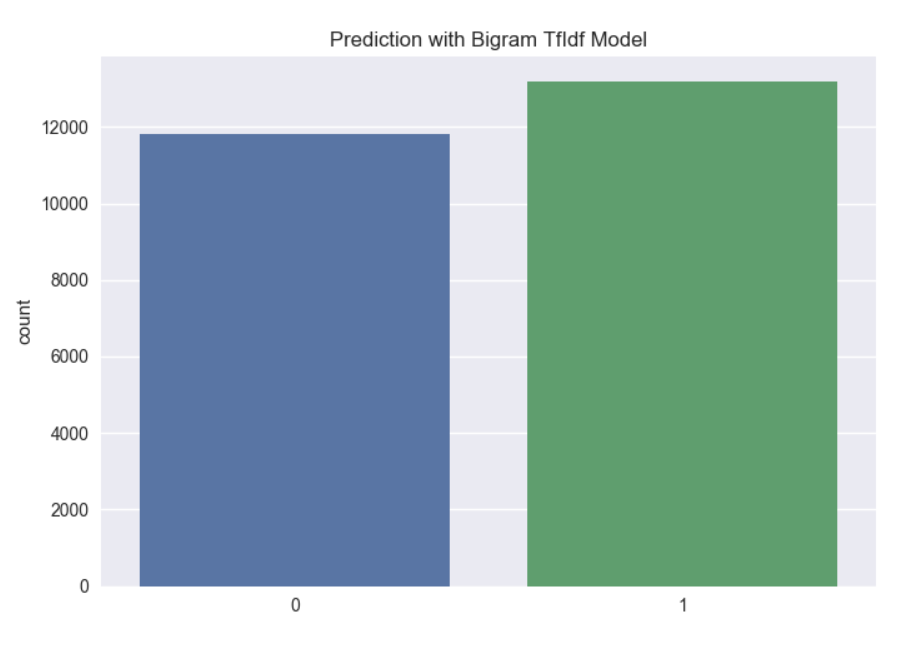

In [44]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week11\\sentiment\\pbit.png')

The next figure shows how the **SGD** for different models converges with epochs. As can be seen, till 100 epochs, the **unigram models** cost function (**hinge loss**) decrease with a much **faster** rate than the **bigram models**.

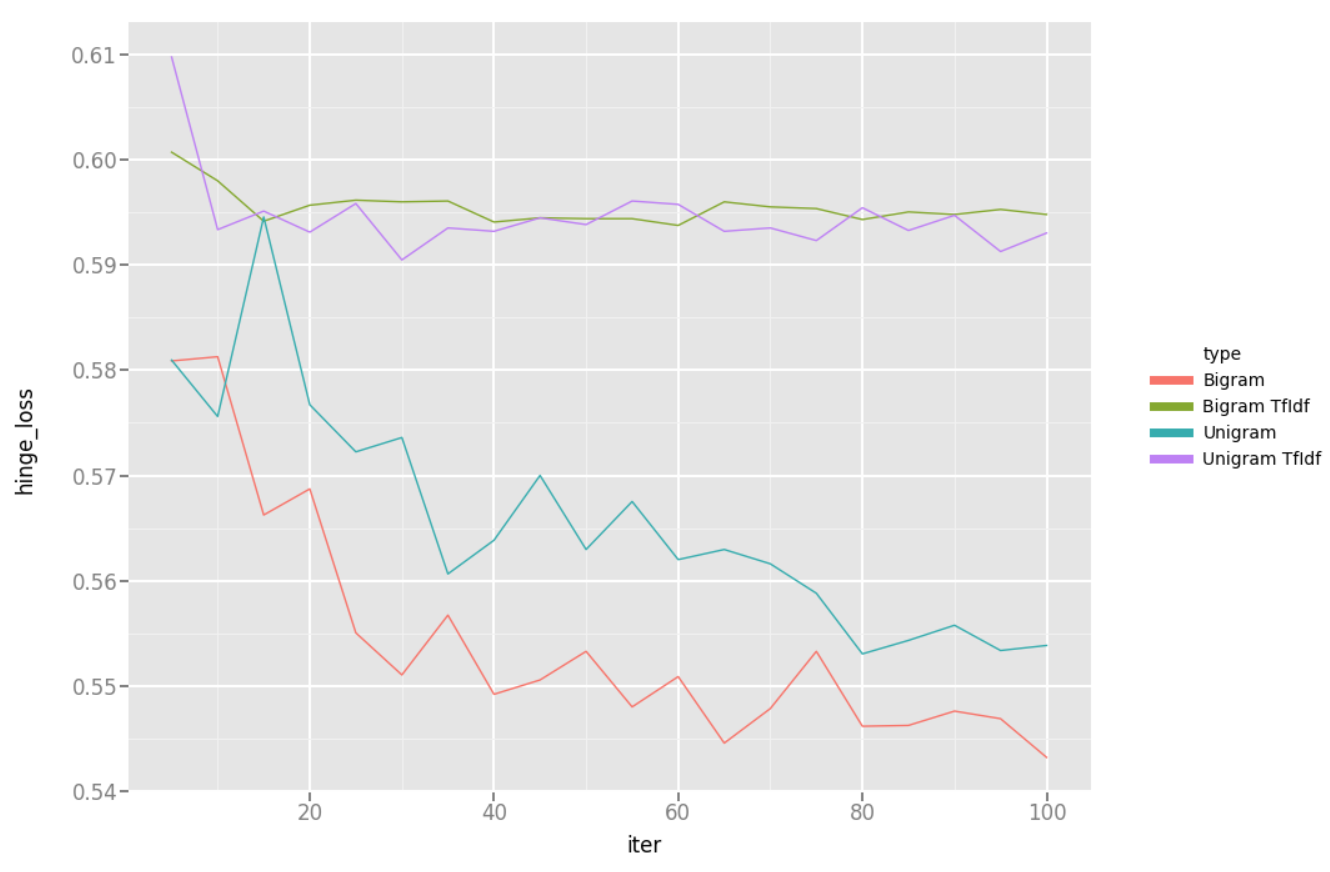

In [41]:
Image(filename='C:\\courses\\Edx\\Current\\AI\\Week11\\sentiment\\sgd.png')